In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [39]:
dataWine=pd.read_csv('winequality-red.csv')

In [40]:
dataWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [41]:
dataWine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7.796296,0.530926,0.193333,2.422222,0.109926,18.111111,58.888889,0.996974,3.314074,0.708519,9.577778,5.333333
std,1.010515,0.159060,0.183156,1.303939,0.075382,11.774592,35.238019,0.001056,0.140199,0.260823,0.416333,0.733799
min,5.600000,0.220000,0.000000,1.200000,0.065000,4.000000,11.000000,0.994300,3.040000,0.460000,9.000000,4.000000
25%,7.400000,0.405000,0.030000,1.750000,0.075500,11.000000,34.000000,0.996700,3.185000,0.550000,9.300000,5.000000
50%,7.800000,0.580000,0.160000,1.900000,0.084000,15.000000,56.000000,0.996900,3.300000,0.590000,9.400000,5.000000
75%,8.000000,0.620000,0.300000,2.350000,0.097500,19.000000,67.000000,0.997800,3.390000,0.800000,9.800000,5.500000
max,11.200000,0.880000,0.560000,6.100000,0.368000,52.000000,148.000000,0.998600,3.580000,1.560000,10.500000,7.000000


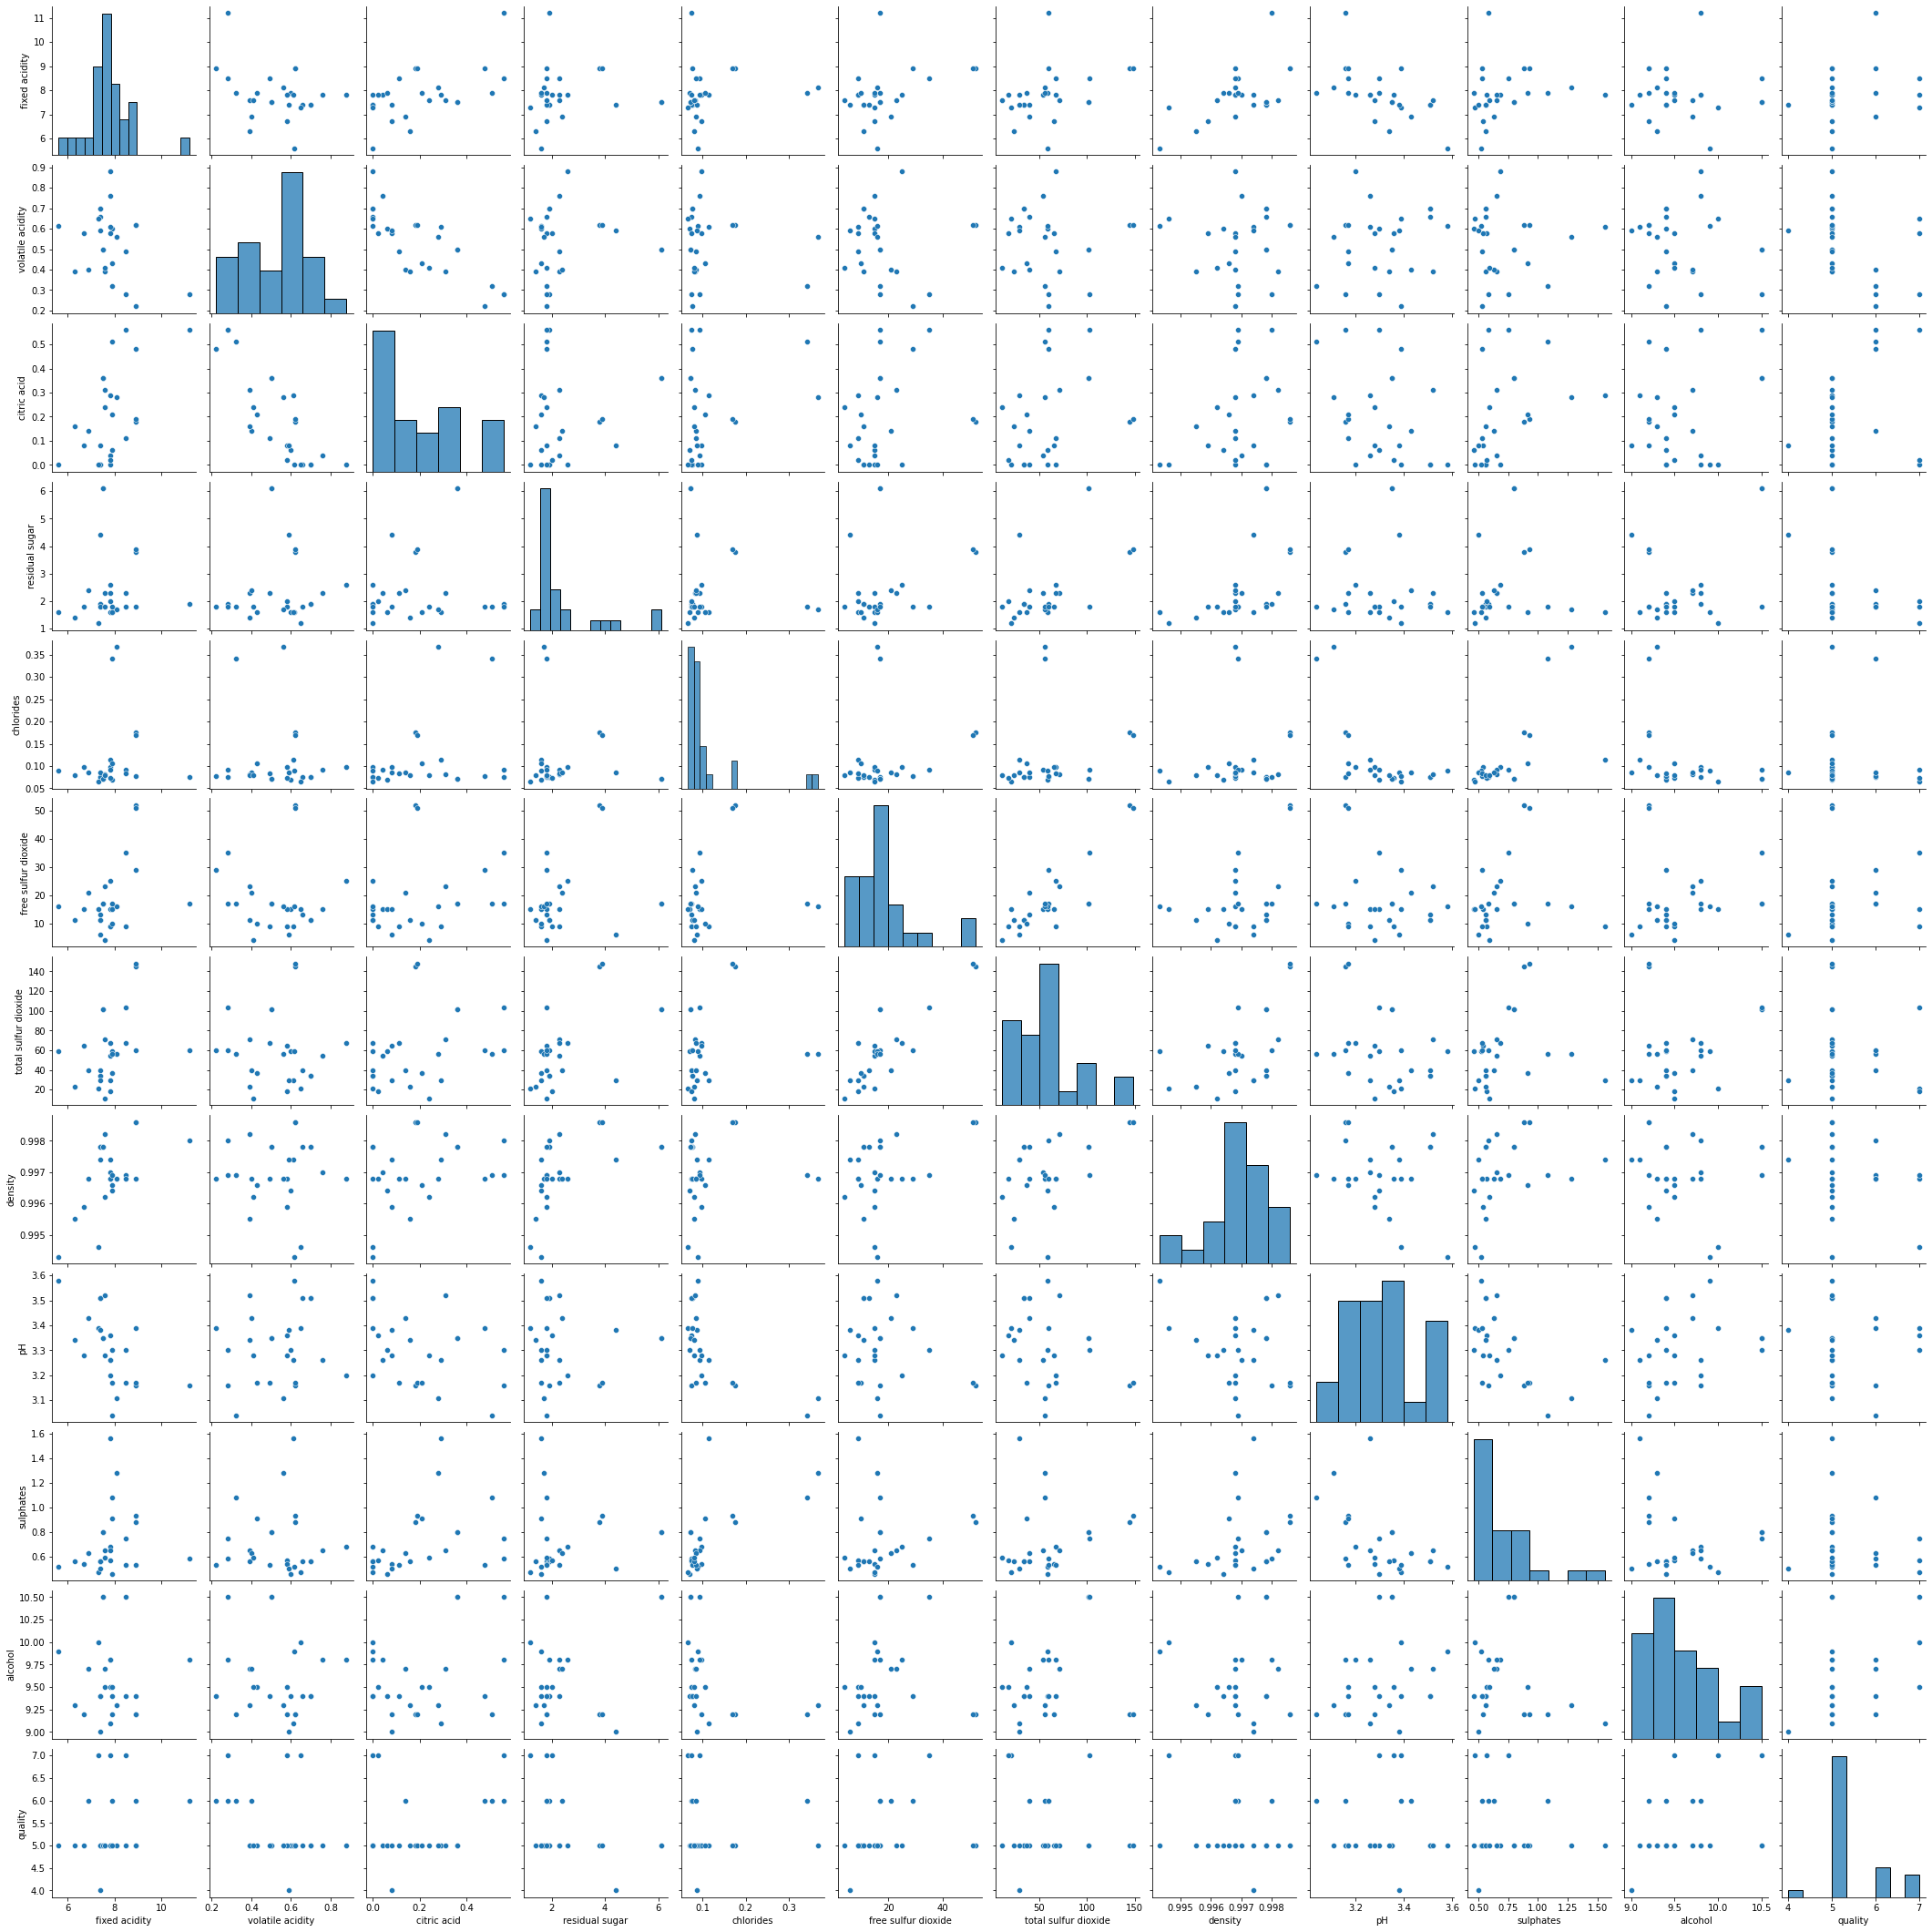

In [42]:
sns.pairplot(dataWine)

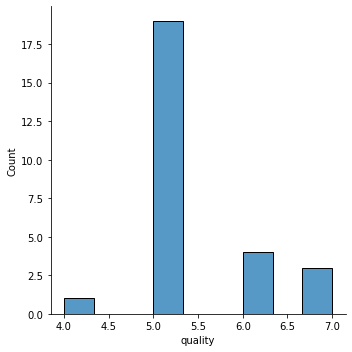

In [43]:
sns.displot(dataWine['quality'])

In [44]:
m= len(dataWine.iloc[:]['residual sugar'])
X= np.matrix(dataWine.iloc[:][['residual sugar', 'fixed acidity']])
Y= np.matrix(dataWine.iloc[:][['quality']])

In [45]:
dataWine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
en = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(Y)
en

matrix([[-0.12371469],
        [ 0.71390058]])

In [47]:
def funCosto(x, y, m, theta):
    ''' 
    Autor: Francisco Jaramillo
    https://www.pakin.lat/
    
    '''
    '''Devuelve el valor de la función de Costo
       x: variable independiente (matriz)
       y: variable dependiente (matriz)
       m: número de muestras (escalar)
    '''
    return np.sum(np.square((x.dot(theta) - y))) / (2 * m)

In [48]:
def DescGrad(x, y, m, alpha, iterations):
    
    ''' 
    Autor: Francisco Jaramillo
    https://www.pakin.lat/
    
    '''
    
    '''Implementa el descenso del gradiente por lote.
       Calcula y guarda el valor de la función de costo J en cada iteración.
       Guarda una serie del número de iteraciones n_iter.
       Devuelve los parámteros theta y un dataframe con el número iteraciones
       y los valores de la función costo.
    '''
    
    #k=0
    
    J = []
    n_iter = []
    theta = np.zeros([2, 1])

    for _ in range(iterations):

        theta[0][0] = theta[0][0] - alpha * np.sum((x.dot(theta) - y)) / (m)
        
        

        theta[1][0] = theta[1][0] - alpha * np.sum(
            np.transpose(
                (x.dot(theta) - y)) * (np.transpose(np.transpose(x)[1]))) / (m)
        
        J.append(funCosto(X, Y, m, theta))
        n_iter.append(_)
        
        #k+=1                
        # hay 577 iteraciones
        #print("numero de iteración: "+str(k)+" J chida: "+str(J[_]))
                
    
    
    df = pd.DataFrame([n_iter, J])
    df = df.transpose()
    #DGEst.reset_index(inplace=True)
    df.columns = ['N_ITER', 'J']
    df['N_ITER'] = df['N_ITER'] + 1

    return theta, df

In [49]:
dgL = DescGrad(X, Y, m, alpha = 0.05, iterations = 577)
dgL[0]

array([[3.32293789e+151],
       [2.31615195e+152]])

In [50]:
def muesAl(r):
    
    ''' 
    Autor: Francisco Jaramillo
    https://www.pakin.lat/
    
    '''
    
    '''Devuelve una muestra aleatoria del conjunto de entrenamiento
       n: tamaño de la muestra en función de la proporción r
       inds: toma n índices aleatorios
    '''
    
    n = int(np.ceil(dataWine.index.size*r))

    inds = random.sample(range(dataWine.index.size), n)

    x = np.matrix(dataWine.iloc[inds][['residual sugar', 'fixed acidity']])

    y = np.matrix(dataWine.iloc[inds][['quality']])
    
    return x, y, n


In [51]:
X_ml, Y_ml, n = muesAl(r=0.7)

dgML = DescGrad(X_ml, Y_ml, n, alpha=0.05, iterations=577)

dgML[0]

array([[3.80105487e+151],
       [2.67645938e+152]])